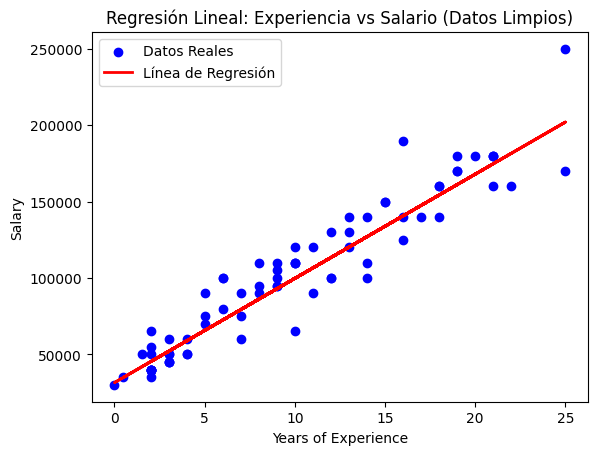

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/alavi-sam/salary-prediction/main/Salary%20Data.csv"
data = pd.read_csv(url)

# Eliminar las filas con valores faltantes en 'Years of Experience' y 'Salary'
data_clean = data.dropna(subset=['Years of Experience', 'Salary'])

# Definir variables independiente (Years of Experience) y dependiente (Salary)
X_clean = data_clean[['Years of Experience']]
y_clean = data_clean['Salary']

# Dividir el dataset en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_clean, y_train_clean)

# Predecir los valores del conjunto de prueba
y_pred_clean = model.predict(X_test_clean)

# Visualizar los resultados: gráfica de los datos reales vs las predicciones
plt.scatter(X_test_clean, y_test_clean, color='blue', label='Datos Reales')
plt.plot(X_test_clean, y_pred_clean, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regresión Lineal: Experiencia vs Salario (Datos Limpios)')
plt.legend()
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/alavi-sam/salary-prediction/main/Salary%20Data.csv"
data = pd.read_csv(url)

# Eliminar las filas con valores faltantes en 'Years of Experience' y 'Salary'
data_clean = data.dropna(subset=['Years of Experience', 'Salary']).copy()  # Crear una copia del DataFrame

# Convertir el nivel educativo a valores numéricos (dummy variables)
data_clean.loc[:, 'Education Level'] = pd.Categorical(data_clean['Education Level'])
data_clean_dummies = pd.get_dummies(data_clean, columns=['Education Level'], drop_first=True)

# Verificar las columnas generadas
print(data_clean_dummies.columns)

# Definir las variables independientes (Age, Years of Experience, y dummies de Education Level)
X_multi = data_clean_dummies[['Age', 'Years of Experience'] + [col for col in data_clean_dummies.columns if 'Education Level_' in col]]
y_multi = data_clean_dummies['Salary']

# Normalizar las variables independientes
scaler = StandardScaler()
X_multi_scaled = scaler.fit_transform(X_multi)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi_scaled, y_multi, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Predecir los valores del conjunto de prueba
y_pred_multi = model_multi.predict(X_test_multi)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test_multi, y_pred_multi)
r2 = r2_score(y_test_multi, y_pred_multi)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Index(['Age', 'Gender', 'Job Title', 'Years of Experience', 'Salary',
       'Education Level_Master's', 'Education Level_PhD'],
      dtype='object')
Mean Squared Error: 263612521.2533889
R-squared: 0.8900506857241137
